In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-full.csv')

### Análise Exploratória

In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


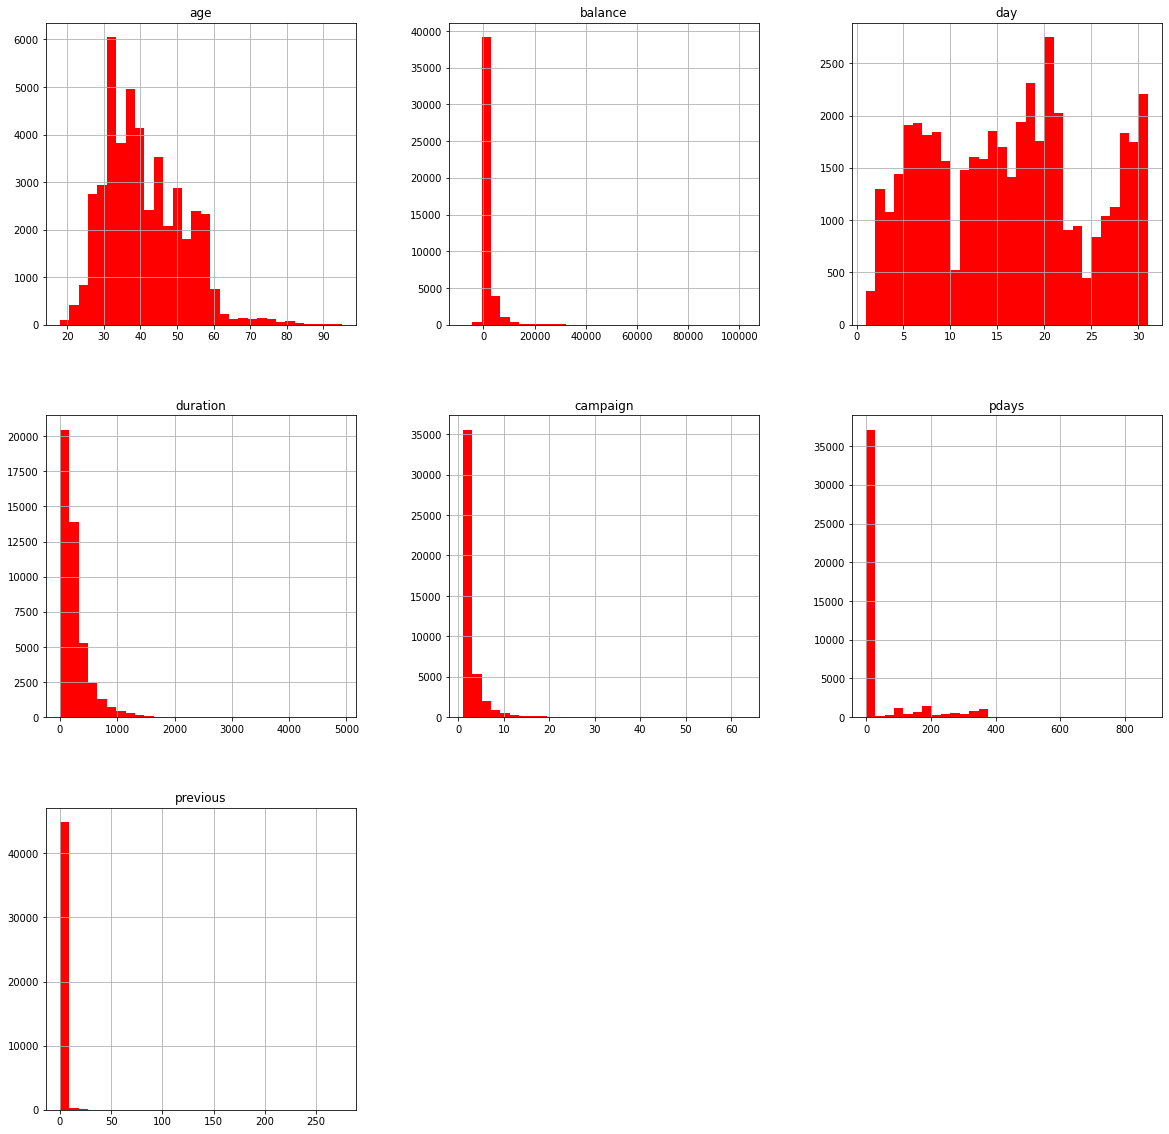

In [6]:
data.hist(bins = 30, figsize=(20,20), color = 'r');

In [7]:
data[data['previous'] > 50].y.value_counts()

no     2
yes    2
Name: y, dtype: int64

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

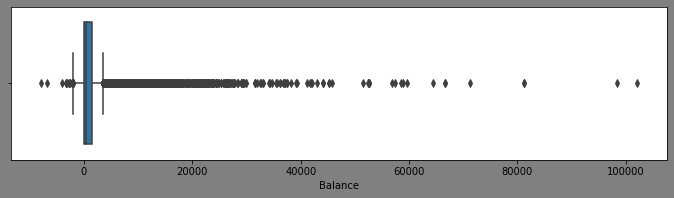

In [11]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(40,40), facecolor='gray')
plotnumber =1
ax = plt.subplot(12,3,plotnumber)
sns.boxplot(data['balance'])
plt.xlabel('Balance')
plt.show()

In [12]:
#Criando faixas saldo dos clientes para facilitar a vizualização.

bins_balance = [-10000, -5000, 0, 5000, 10000, 20000, 50000, 110000] 
group_labels = ['divida alta', 'divida baixa', 'zero', 'saldo', 'saldo bom', 'saldo otimo', 'saldo elevado']

balance_categorizado = pd.cut(data.balance, bins = bins_balance, labels = group_labels)

In [13]:
data['balance_cat'] = balance_categorizado

In [14]:
pd.crosstab(data.balance_cat, data.y)

y,no,yes
balance_cat,,
divida alta,2,0
divida baixa,6776,502
zero,30740,4346
saldo,1710,306
saldo bom,530,106
saldo otimo,150,25
saldo elevado,14,4


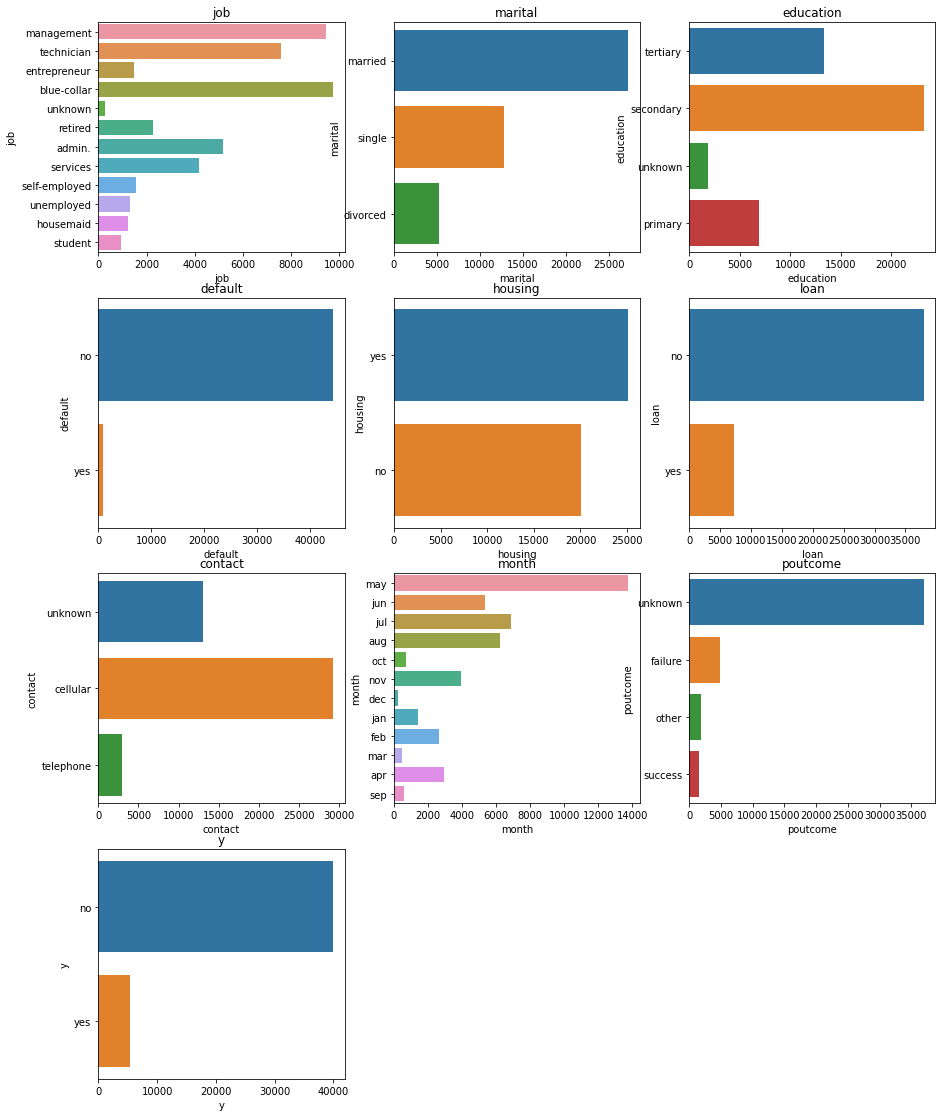

In [15]:
# Verficando a distribuição dos dados categóricos

cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
              'month', 'poutcome', 'y']

plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=data)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

### Limpeza do Dataframe

In [16]:
# Vamos excluir as colunas e linhas sem relevância.

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'balance_cat'],
      dtype='object')

In [17]:
# Excluimos então as colunas 'contact' e 'poutcome', por terem pouca relevancia e 
# criamos um novo DataFrame de estudo. 

data_std = data[['age', 
                'job', 
                'marital', 
                'education', 
                'default', 
                'balance', 
                'housing',       
                'loan', 
                'day', 
                'month', 
                'duration', 
                'campaign', 
                'pdays',       
                'previous', 
                'y', 
                'balance_cat']].copy()

### Perfil do Cliente

In [18]:
data_std.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'balance_cat'],
      dtype='object')

<AxesSubplot:title={'center':'Ages'}, ylabel='Values %'>

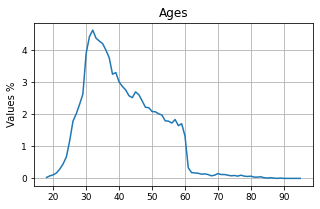

In [19]:
ages = round(data_std['age'].value_counts()/len(data_std)*100,2)

ages.sort_index().plot(kind='line', title='Ages' , ylabel = 'Values %', fontsize=9, figsize = (5,3), grid=True)

In [20]:
jobs = round(data_std['job'].value_counts()/len(data_std)*100,2)

100 - jobs[jobs.index == 'unemployed'][0] + jobs[jobs.index == 'unknown'][0]

97.76

<AxesSubplot:title={'center':'Maritals'}, ylabel='marital'>

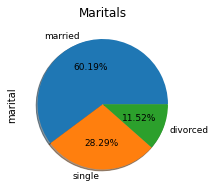

In [29]:
maritals = round(data_std['marital'].value_counts()/len(data_std)*100,2)

maritals.plot(kind='pie', title='Maritals', fontsize=9, figsize = (5,3), autopct="%.2f%%", shadow=True)

<AxesSubplot:title={'center':'Educations'}, ylabel='education'>

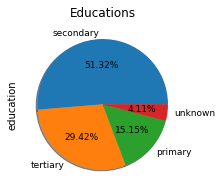

In [22]:
educations = round(data_std['education'].value_counts()/len(data_std)*100,2)

educations.plot(kind='pie', title='Educations', fontsize=9, figsize = (5,3), autopct="%.2f%%", shadow=True) 

In [23]:
data_std.groupby('y').marital.value_counts()

y    marital 
no   married     24459
     single      10878
     divorced     4585
yes  married      2755
     single       1912
     divorced      622
Name: marital, dtype: int64

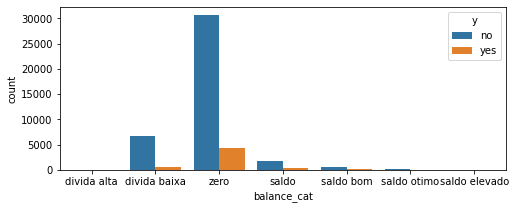

In [24]:
fig, axes = plt.subplots(figsize=(8, 3))
df = data_std['balance_cat'].value_counts()
countplot = sns.countplot(x=data_std['balance_cat'], data=data_std, hue='y')

In [25]:
percent = (data_std['balance_cat'].value_counts() / (len(data_std.balance_cat))).round(3)*100
percent[:5]

zero            77.6
divida baixa    16.1
saldo            4.5
saldo bom        1.4
saldo otimo      0.4
Name: balance_cat, dtype: float64

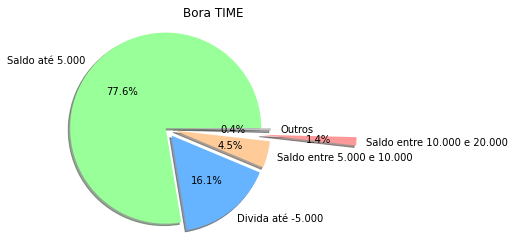

In [26]:
labels = 'Saldo até 5.000', 'Divida até -5.000', 'Saldo entre 5.000 e 10.000', 'Saldo entre 10.000 e 20.000', 'Outros'#, 'saldo elevado', 'divida alta'
sizes = percent[:5]
explode = (0, 0.1, 0.1, 1, 0.1)#, 2.5, 4)  

colors = ['#99ff99', '#66b3ff', '#ffcc99', '#ff9999', 'silver']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors = colors,
       autopct='%1.1f%%', shadow=True, startangle=0)

plt.title("Bora TIME") #"Error model Lasso-$R^2$: %.2f" % (data_std['balance_cat'].value_counts()))
ax.axis('equal')

plt.show()

In [27]:
"""
import sweetviz as sv
#Analise 
report = sv.analyze(data)

#Mostrar analise
report.show_html('explora_report_html')
"""

"\nimport sweetviz as sv\n#Analise \nreport = sv.analyze(data)\n\n#Mostrar analise\nreport.show_html('explora_report_html')\n"